In [2]:
import tensorflow as tf


c:\Users\Pranav\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
CIFAR10 = tf.keras.datasets.cifar10

In [4]:
(X_train,y_train), (X_test,y_test) = CIFAR10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\Pranav\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=11,
    validation_data=(X_test, y_test)
)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4750 - loss: 1.4614 - val_accuracy: 0.5770 - val_loss: 1.2071
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6116 - loss: 1.1071 - val_accuracy: 0.6018 - val_loss: 1.1286
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6597 - loss: 0.9812 - val_accuracy: 0.6624 - val_loss: 0.9844
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6868 - loss: 0.8977 - val_accuracy: 0.6521 - val_loss: 1.0062
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.8425 - val_accuracy: 0.6794 - val_loss: 0.9557
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7254 - loss: 0.7856 - val_accuracy: 0.6832 - val_loss: 0.9229
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7394 - loss: 0.7403 - val_accuracy: 0.6892 - val_loss: 0.9174
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7588 - loss: 0.6982 -

 ### WE did't get a 90+ accuracy so maybe model will  not predict well on unseen data.

In [10]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


In [27]:
index = 8   # take any but less than test size  
img = X_test[index]


In [28]:
pred = model.predict(img.reshape(1,32,32,3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
predicted_class = np.argmax(pred)
actual_class = y_test[index][0]


In [31]:
print("Predicted:", class_names[predicted_class])
print("Actual:", class_names[actual_class])


Predicted: cat
Actual: cat


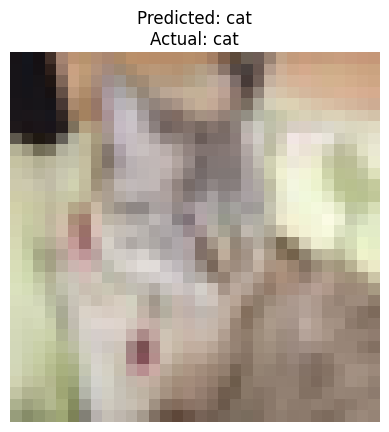

In [32]:
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}\nActual: {class_names[actual_class]}")
plt.axis('off')
plt.show()


### Predicting multiple images :-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


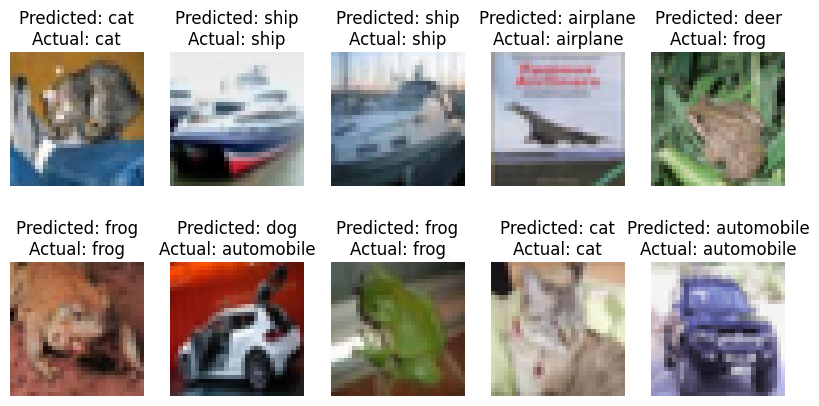

In [40]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_test[i]
    pred = model.predict(img.reshape(1,32,32,3))
    predicted_class = np.argmax(pred)
    actual_class = y_test[i][0]
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}\nActual: {class_names[actual_class]}")
    plt.axis('off')



As accuracy is less than 90% so we can not trust this model on unseen data.
As for example label of frog and dog are getting confused also for automobile.